In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from xata.client import XataClient
import duckdb as db
from datetime import datetime

In [4]:
type(datetime.now().strftime("%Y-%m-%d"))

str

In [5]:
xata = XataClient(
   db_url="https://gautam-naik-s-workspace-sv2qks.ap-southeast-2.xata.sh/db/gmmm"
)


In [6]:
def load_data():
    trades = []

    records = xata.data().query("trades_v1", {
        "page": {
            "size": 1000
        }
    })

    trades.extend(records["records"])

    while records.has_more_results():
        records = xata.data().query("trades_v1", {
            "page": {
                "after": records.get_cursor(),
                "size": 1000
            }
        })
        trades.extend(records["records"])

    df = pd.DataFrame(trades)
    df = df.drop(["xata", "id"], axis=1)
    return df


trades = []

records = xata.data().query("trades_v1", {
    "page": {
        "size": 1000
    }
})

trades.extend(records["records"])

while records.has_more_results():
    records = xata.data().query("trades_v1", {
        "page": {
            "after": records.get_cursor(),
            "size": 1000
        }
    })
    trades.extend(records["records"])

df = pd.DataFrame(trades)
df = df.drop(["xata", "id"], axis=1)


In [4]:
records

{'id': 'e57aa64d-d43a-9650-9fc8-ab496f8e3a89',
 'message': 'database branch [None:main] not found'}

In [7]:
df

,brokerage,buy_time,buy_value,date,net_pnl,pnl,sell_time,sell_value,strategy,symbol,tax,traded_qty
0,0.0,09:15:46,4179.95,2024-01-10T00:00:00Z,3.13,4.65,15:10:23,4184.60,MEAN_REVERSION,SIEMENS,1.52,1
1,0.0,09:15:49,4946.40,2024-01-10T00:00:00Z,-118.76,-117.00,12:06:07,4829.40,SWING_STOCHASTIC_RSI,GRANULES,1.76,12
2,0.0,09:15:27,4979.70,2024-01-11T00:00:00Z,16.88,18.70,15:10:24,4998.40,SWING_STOCHASTIC_RSI,CANBK,1.82,11
3,0.0,09:37:14,4617.60,2024-01-11T00:00:00Z,-45.77,-44.10,15:10:24,4573.50,SWING_STOCHASTIC_RSI,SBICARD,1.67,6
4,0.0,09:15:55,4960.80,2024-01-11T00:00:00Z,-27.80,-26.00,15:10:24,4934.80,SWING_STOCHASTIC_RSI,PNB,1.80,52
...,...,...,...,...,...,...,...,...,...,...,...,...
2490,0.0,10:45:40,6748.50,2024-04-18T00:00:00Z,60.23,62.70,10:15:19,6811.20,INTRADAY_GAP_UP,HDFCLIFE,2.47,11
2491,0.0,09:15:47,4760.00,2024-04-19T00:00:00Z,164.82,166.60,15:10:23,4926.60,MEAN_REVERSION,INDUSTOWER,1.78,14
2492,0.0,09:15:48,3794.10,2024-04-19T00:00:00Z,80.05,81.45,15:10:23,3875.55,MEAN_REVERSION,BHARTIARTL,1.40,3
2493,0.0,09:15:46,3383.90,2024-04-19T00:00:00Z,-5.33,-4.10,15:10:23,3379.80,MEAN_REVERSION,ICICIGI,1.23,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brokerage   2484 non-null   float64
 1   buy_time    2484 non-null   object 
 2   buy_value   2484 non-null   float64
 3   date        2484 non-null   object 
 4   net_pnl     2484 non-null   float64
 5   pnl         2484 non-null   float64
 6   sell_time   2484 non-null   object 
 7   sell_value  2484 non-null   float64
 8   strategy    2484 non-null   object 
 9   symbol      2484 non-null   object 
 10  tax         2484 non-null   float64
 11  traded_qty  2484 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 233.0+ KB


In [14]:
df=pd.read_csv('../data/trades_v1.csv')

In [15]:
df

,brokerage,buy_time,buy_value,date,net_pnl,pnl,sell_time,sell_value,strategy,symbol,tax,traded_qty
0,0.0,09:15:46,4179.95,2024-01-10T00:00:00Z,3.13,4.65,15:10:23,4184.60,MEAN_REVERSION,SIEMENS,1.52,1
1,0.0,09:15:49,4946.40,2024-01-10T00:00:00Z,-118.76,-117.00,12:06:07,4829.40,SWING_STOCHASTIC_RSI,GRANULES,1.76,12
2,0.0,09:15:27,4979.70,2024-01-11T00:00:00Z,16.88,18.70,15:10:24,4998.40,SWING_STOCHASTIC_RSI,CANBK,1.82,11
3,0.0,09:37:14,4617.60,2024-01-11T00:00:00Z,-45.77,-44.10,15:10:24,4573.50,SWING_STOCHASTIC_RSI,SBICARD,1.67,6
4,0.0,09:15:55,4960.80,2024-01-11T00:00:00Z,-27.80,-26.00,15:10:24,4934.80,SWING_STOCHASTIC_RSI,PNB,1.80,52
...,...,...,...,...,...,...,...,...,...,...,...,...
2490,0.0,10:45:40,6748.50,2024-04-18T00:00:00Z,60.23,62.70,10:15:19,6811.20,INTRADAY_GAP_UP,HDFCLIFE,2.47,11
2491,0.0,09:15:47,4760.00,2024-04-19T00:00:00Z,164.82,166.60,15:10:23,4926.60,MEAN_REVERSION,INDUSTOWER,1.78,14
2492,0.0,09:15:48,3794.10,2024-04-19T00:00:00Z,80.05,81.45,15:10:23,3875.55,MEAN_REVERSION,BHARTIARTL,1.40,3
2493,0.0,09:15:46,3383.90,2024-04-19T00:00:00Z,-5.33,-4.10,15:10:23,3379.80,MEAN_REVERSION,ICICIGI,1.23,2


In [23]:
df.describe()

,brokerage,buy_value,net_pnl,pnl,sell_value,tax,traded_qty
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,0.751547,5365.333463,-2.826657,0.009920,5365.343383,2.085058,15.921042
std,1.369219,1257.237164,92.383932,92.359757,1255.257901,0.522483,19.612193
min,0.000000,346.000000,-319.500000,-316.000000,346.950000,0.130000,1.000000
25%,0.000000,4663.600000,-55.670000,-52.900000,4653.775000,1.730000,3.000000
50%,0.000000,4981.250000,-6.160000,-3.600000,4989.500000,2.120000,8.000000
75%,0.000000,6315.125000,45.525000,47.775000,6321.600000,2.370000,20.000000
max,3.980000,12317.900000,753.830000,759.500000,12293.200000,4.470000,128.000000


In [17]:
df["date"] = pd.to_datetime(df["date"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   brokerage   2495 non-null   float64            
 1   buy_time    2495 non-null   object             
 2   buy_value   2495 non-null   float64            
 3   date        2495 non-null   datetime64[ns, UTC]
 4   net_pnl     2495 non-null   float64            
 5   pnl         2495 non-null   float64            
 6   sell_time   2495 non-null   object             
 7   sell_value  2495 non-null   float64            
 8   strategy    2495 non-null   object             
 9   symbol      2495 non-null   object             
 10  tax         2495 non-null   float64            
 11  traded_qty  2495 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(4)
memory usage: 234.0+ KB


In [19]:
df["Day_of_week"] = df["date"].dt.day_name()

In [21]:
df.groupby("Day_of_week")["net_pnl"].sum()

Day_of_week
Friday      -2899.96
Monday      -2952.48
Thursday     2167.39
Tuesday     -5315.07
Wednesday    1947.61
Name: net_pnl, dtype: float64

In [9]:
daily_df=df.groupby('date')["net_pnl"].sum().reset_index().set_index('date')

In [10]:
daily_df.index = pd.to_datetime(daily_df.index)

In [11]:
daily_df["cum_pnl"]=daily_df["net_pnl"].cumsum()

<Axes: xlabel='date'>

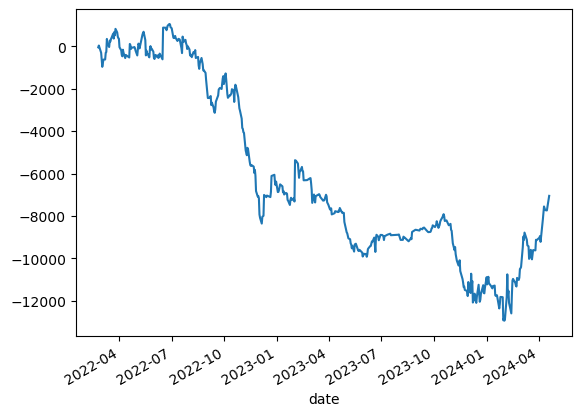

In [12]:
daily_df["cum_pnl"].plot()

In [25]:
df.to_csv('./df.csv', index=False)

In [14]:
daily_df.tail(30)["net_pnl"]

date
2024-02-28    410.04
2024-02-29     33.38
2024-03-01     62.41
2024-03-04    933.79
2024-03-05    497.79
2024-03-06   -154.47
2024-03-07    343.30
2024-03-11   -334.25
2024-03-12   -269.88
2024-03-14    -42.01
2024-03-15   -591.95
2024-03-18    424.70
2024-03-19   -376.20
2024-03-20    -72.08
2024-03-21    238.82
2024-03-22    198.49
2024-03-26    -14.94
2024-03-27    499.53
2024-03-28    -23.24
2024-04-02    124.15
2024-04-03     76.39
2024-04-04   -274.42
2024-04-05    260.67
2024-04-08    797.55
2024-04-10    609.76
2024-04-12   -171.40
2024-04-15    -17.70
2024-04-16    178.75
2024-04-18    322.98
2024-04-19    186.86
Name: net_pnl, dtype: float64

In [15]:
daily_df

,net_pnl,cum_pnl
date,,
2022-02-23,-53.40,-53.40
2022-02-24,84.16,30.76
2022-02-28,-339.50,-308.74
2022-03-02,-663.59,-972.33
2022-03-04,339.32,-633.01
...,...,...
2024-04-12,-171.40,-7723.40
2024-04-15,-17.70,-7741.10
2024-04-16,178.75,-7562.35


In [21]:
daily_df['net_pnl'].tail(1)

date
2024-04-19    186.86
Name: net_pnl, dtype: float64

In [5]:
daily_df.index

NameError: name 'daily_df' is not defined

In [23]:
monthly_df=daily_df.resample("M").sum()
monthly_df["cum_pnl"]=monthly_df["net_pnl"].cumsum()
monthly_df

,net_pnl,cum_pnl
date,,
2022-02-28,-308.74,-308.74
2022-03-31,661.19,352.45
2022-04-30,-561.68,-209.23
2022-05-31,-337.81,-547.04
2022-06-30,1443.11,896.07
2022-07-31,-898.80,-2.73
2022-08-31,-1595.03,-1597.76
2022-09-30,-184.17,-1781.93
2022-10-31,-1631.43,-3413.36


In [24]:
px.bar(monthly_df,x=monthly_df.index,y="net_pnl")

In [25]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=monthly_df.index,
                     y=monthly_df["net_pnl"],
                     text=round(monthly_df["net_pnl"], 0),

                     ), secondary_y=False)

# add a line chart as the second trace with different axis
fig.add_trace(go.Scatter(x=monthly_df.index,
              y=monthly_df["cum_pnl"]), secondary_y=True)


fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Monthly PnL",


    legend_orientation="h",
    legend_yanchor="bottom",
    legend_xanchor="auto",
)


fig.show()

In [26]:
fig = go.Figure()

fig.add_trace(go.Bar(x=monthly_df.index,
                     y=monthly_df["net_pnl"],
                     text=round(monthly_df["net_pnl"], 0),
                    marker_color= []
                     ))




fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Monthly PnL",


    legend_orientation="h",
    legend_yanchor="bottom",
    legend_xanchor="auto",
)


fig.show()

In [27]:
options = ['INTRADAY_GAP_UP', 'SWING_STOCHASTIC_RSI']

In [28]:
df[df["strategy"].isin(options)]

,brokerage,buy_time,buy_value,date,net_pnl,pnl,sell_time,sell_value,strategy,symbol,tax,traded_qty
1,0.0,09:15:49,4946.40,2024-01-10,-118.76,-117.0,12:06:07,4829.40,SWING_STOCHASTIC_RSI,GRANULES,1.76,12
2,0.0,09:15:27,4979.70,2024-01-11,16.88,18.7,15:10:24,4998.40,SWING_STOCHASTIC_RSI,CANBK,1.82,11
3,0.0,09:37:14,4617.60,2024-01-11,-45.77,-44.1,15:10:24,4573.50,SWING_STOCHASTIC_RSI,SBICARD,1.67,6
4,0.0,09:15:55,4960.80,2024-01-11,-27.80,-26.0,15:10:24,4934.80,SWING_STOCHASTIC_RSI,PNB,1.80,52
5,0.0,09:16:01,3373.40,2024-01-11,-54.01,-52.8,14:22:39,3320.60,SWING_STOCHASTIC_RSI,BAJAJFINSV,1.21,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2453,0.0,15:10:40,6920.00,2023-01-27,-23.51,-21.0,10:15:18,6899.00,INTRADAY_GAP_UP,ITC,2.51,20
2454,0.0,10:30:28,6711.75,2023-01-27,-47.43,-45.0,10:15:18,6666.75,INTRADAY_GAP_UP,TATAMOTORS,2.43,15
2460,0.0,15:10:40,6855.00,2023-01-31,33.50,36.0,10:15:19,6891.00,INTRADAY_GAP_UP,BPCL,2.50,20
2473,0.0,11:24:54,6561.15,2023-02-03,126.58,129.0,10:15:19,6690.15,INTRADAY_GAP_UP,INDUSINDBK,2.42,6


In [29]:
monthly_df=df.groupby(["strategy","date"])["net_pnl"].sum().reset_index().set_index(["date"])
monthly_df.index = pd.to_datetime(monthly_df.index)
monthly_df=monthly_df.groupby("strategy").resample("M").sum().drop("strategy",axis=1).reset_index().set_index("date")
# monthly_df=monthly_df.reset_index()

In [30]:
monthly_df

,strategy,net_pnl
date,,
2022-10-31,INTRADAY_GAP_UP,190.65
2022-11-30,INTRADAY_GAP_UP,129.14
2022-12-31,INTRADAY_GAP_UP,102.72
2023-01-31,INTRADAY_GAP_UP,-280.74
2023-02-28,INTRADAY_GAP_UP,72.38
2023-03-31,INTRADAY_GAP_UP,53.17
2023-04-30,INTRADAY_GAP_UP,-223.08
2023-05-31,INTRADAY_GAP_UP,-183.05
2023-06-30,INTRADAY_GAP_UP,223.77


In [31]:
fig = px.bar(monthly_df, x=monthly_df.index, y="net_pnl", 
             color="strategy", barmode = 'group')

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Monthly PnL",
    legend_orientation="h",
    legend_yanchor="top",
    legend_xanchor="auto",
    legend_y=1.1,
    legend_title_text='Strategy',
)
fig.show()

In [6]:
df["result"]=np.where(df["net_pnl"]>0,1,0)
df["winning_amount_pct"] = df["net_pnl"]*100/df["buy_value"]

In [42]:
strategy_df=df.groupby(["strategy"]).agg({"result":["sum", "count"], "winning_amount_pct":["mean", "max","min"]})
strategy_df

result       winning_amount_pct                     
                        sum count               mean        max       min
strategy                                                                 
INTRADAY_GAP_UP         183   392           0.064228   4.467906 -2.280420
MEAN_REVERSION          815  1754          -0.046950  14.835377 -3.156439
SWING_STOCHASTIC_RSI    148   335          -0.067997   5.158182 -3.231189

In [43]:
strategy_df.columns= ["win","total", "mean_pct","max_pct","min_pct"]
strategy_df["win_rate"]=(strategy_df["win"]*100)/strategy_df["total"]
strategy_df

,win,total,mean_pct,max_pct,min_pct,win_rate
strategy,,,,,,
INTRADAY_GAP_UP,183,392,0.064228,4.467906,-2.280420,46.683673
MEAN_REVERSION,815,1754,-0.046950,14.835377,-3.156439,46.465222
SWING_STOCHASTIC_RSI,148,335,-0.067997,5.158182,-3.231189,44.179104


In [45]:
strategy_df.loc["MEAN_REVERSION"]["total"]

1754.0

In [7]:
df

,strategy,sell_time,symbol,tax,sell_value,pnl,brokerage,traded_qty,buy_value,buy_time,net_pnl,date,result,winning_amount_pct
0,MEAN_REVERSION,10:04:00,APOLLOHOSP,2.20,4641.90,-91.35,2.84,1,4733.25,09:15:00,-96.39,2022-02-23,0,-2.036444
1,MEAN_REVERSION,03:14:00,NATIONALUM,2.31,4909.80,35.70,2.92,42,4874.10,09:15:00,30.47,2022-02-23,1,0.625141
2,MEAN_REVERSION,09:52:00,METROPOLIS,1.96,4127.80,-82.20,2.53,2,4210.00,09:15:00,-86.69,2022-02-23,0,-2.059145
3,MEAN_REVERSION,03:14:00,NAM-INDIA,2.24,4782.00,104.25,2.81,15,4677.75,09:22:00,99.21,2022-02-23,1,2.120891
4,MEAN_REVERSION,03:06:00,CROMPTON,2.32,4951.20,89.40,2.92,12,4861.80,09:22:00,84.16,2022-02-24,1,1.731046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,MEAN_REVERSION,15:10:24,MCDOWELL-N,1.72,4727.00,-63.60,0.00,4,4790.60,09:15:46,-65.32,2024-04-12,0,-1.363504
2477,MEAN_REVERSION,15:10:24,INDIGO,1.35,3696.50,-99.30,0.00,1,3795.80,09:15:46,-100.65,2024-04-12,0,-2.651615
2478,MEAN_REVERSION,15:10:24,IDFC,1.75,4814.55,-21.45,0.00,39,4836.00,09:15:46,-23.20,2024-04-12,0,-0.479735
2479,MEAN_REVERSION,15:10:24,VEDL,1.76,4864.60,135.20,0.00,13,4729.40,09:15:46,133.44,2024-04-12,1,2.821500


In [19]:
db.sql("""
       with cte as (
       select symbol, strategy, round(sum(net_pnl),2) as total_pnl, row_number() over(partition by strategy order by total_pnl desc) rnk from df group by strategy, symbol order by strategy, rnk)
       select * from cte where rnk<=5
       """)

┌────────────┬──────────────────────┬───────────┬───────┐
│   symbol   │       strategy       │ total_pnl │  rnk  │
│  varchar   │       varchar        │  double   │ int64 │
├────────────┼──────────────────────┼───────────┼───────┤
│ INDIGO     │ INTRADAY_GAP_UP      │    387.21 │     1 │
│ TATAMTRDVR │ INTRADAY_GAP_UP      │    382.34 │     2 │
│ ADANIGREEN │ INTRADAY_GAP_UP      │    364.52 │     3 │
│ GODREJCP   │ INTRADAY_GAP_UP      │    362.62 │     4 │
│ ZOMATO     │ INTRADAY_GAP_UP      │    300.59 │     5 │
│ FEDERALBNK │ MEAN_REVERSION       │    986.35 │     1 │
│ INDIACEM   │ MEAN_REVERSION       │    833.42 │     2 │
│ POLYCAB    │ MEAN_REVERSION       │    801.32 │     3 │
│ BHEL       │ MEAN_REVERSION       │    797.39 │     4 │
│ PNB        │ MEAN_REVERSION       │    584.84 │     5 │
│ ACC        │ SWING_STOCHASTIC_RSI │    464.19 │     1 │
│ TATASTEEL  │ SWING_STOCHASTIC_RSI │    407.67 │     2 │
│ MPHASIS    │ SWING_STOCHASTIC_RSI │    300.24 │     3 │
│ INDIGO     │